In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
plt.ion()

import sklearn.decomposition

### Dataset 1: très bien pour commencer mais très petit, donc les expériences donneront des résultat plutôt peu intéressants dessus.


In [2]:
## data set 1 ##
K=10
import sklearn.datasets
X,y = sklearn.datasets.load_digits(n_class=K, return_X_y=True)
DimRepre = 8
ratio_train = 0.6 # on peut reduire ce nombre lorsqu'on utilise le gros data set, mnist70.npz
ratio_valid = 0.3 # on peut reduire ce nombre lorsqu'on utilise le gros data set, mnist70.npz


### Dataset 2: mieux car plus grand, donc résultats plus intéressants. Attention, les expériences peuvent mettre du temps à tourner. 

Il peut être intéressant de commencer vos recherche sur une version plus petite du dataset (en gardant que 10% des data par exemple), et quand votre code marche bien et que vous avez resséré la plage de valeurs des hyper-paramètre qui est vraisemblablement la bonne, faire une recherche plus précise sur l'ensemble du dataset.

Astuce: en particulier, n'utilisez pas un grand nombre de composantes PCA sur ce dataset (en tout cas ne faites pas PCA(grand n_comp) + featureMap_polynomiale(degré2) + SVM là dessus.

À aller chercher sur : https://gitlab.inria.fr/flandes/data-for-teaching

Dans le shell linux, faites: 
`wget https://gitlab.inria.fr/flandes/data-for-teaching/-/raw/master/mnist70.npz?inline=false`



In [3]:
# # data set 2 ##
# LoadObject = np.load("/home/flandes/data/mnist70.npz") ## adresse à adapter à votre cas bien sur !
# DimRepre = 28
# X = LoadObject['X']
# y = LoadObject['y']
# del LoadObject
# ratio_train = 0.1  ## !! ici on ne garde que 10% pour train, pour que ça tourne vite, lorsqu'on développe le code !
# ratio_valid = 0.1

### Dataset 3: même remarques que pour le 2

À aller chercher sur : https://gitlab.inria.fr/flandes/data-for-teaching



In [4]:
# ## data set 3 ##
# LoadObject = np.load("fashion-mnist-reshaped.npz")
# DimRepre = 28
# X = LoadObject['train_images']
# y = LoadObject['train_labels']
# Xtest = LoadObject['test_images']
# ytest = LoadObject['test_labels']
# X     = np.array(X    , dtype=float) ## on change le type, car c'est unsigned-int (uint) au depart
# Xtest = np.array(Xtest, dtype=float)
# del LoadObject
# ratio_train = 0.1
# ratio_valid = 0.1

In [5]:
## on en prend pas de mauvaises habitudes: meme pour du non supervisé, on partage entre train et test
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
NCOMP =4 ## on en garde 4, pour éventuellement tracer aussi les paires suivantes
maPCA = sklearn.decomposition.PCA(n_components=NCOMP)
maPCA.fit(X_train) # remarquez qu'on n'utilise pas les y_train !
X_transformee = maPCA.transform(X_train)
X_transformee.shape

(1203, 4)

In [7]:
mycolorBar = cm.tab10
mycolorBar(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

## Tracé de la composante 0 (la plus importante) vs la 1

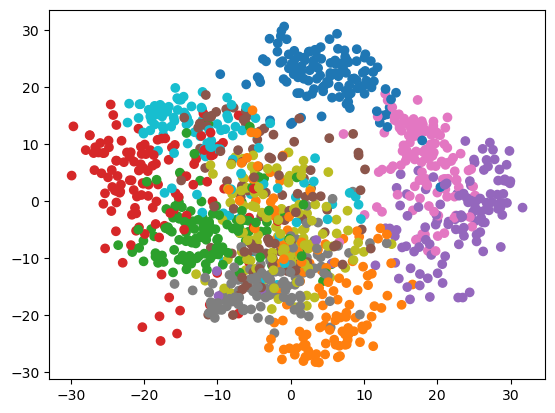

In [8]:
plt.scatter(X_transformee[:,0], X_transformee[:,1], c=mycolorBar(y_train))

## Tracé de la composante 2 vs la 1

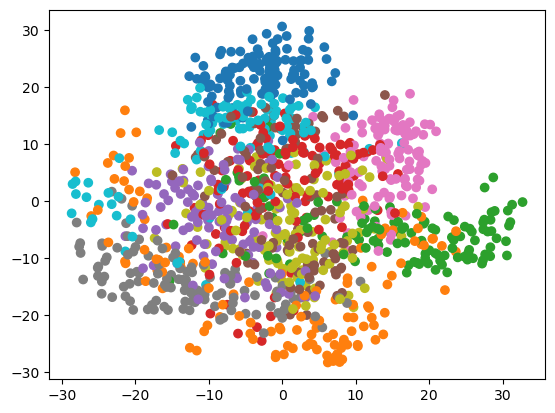

In [9]:
plt.scatter(X_transformee[:,2], X_transformee[:,1], c=mycolorBar(y_train))

## Tracé de la composante 2 vs la 1, avec comme taille de marker la composante 0

/home/flandes/local_installs/mambaforge/envs/sandbox/lib/python3.11/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


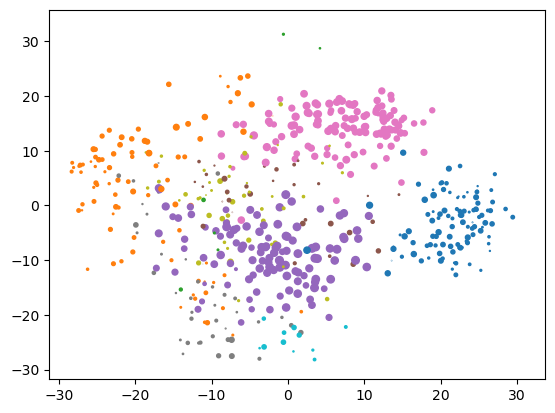

In [10]:
plt.scatter(X_transformee[:,1], X_transformee[:,2], s=X_transformee[:,0], c=mycolorBar(y_train))
